In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [24]:
from torch.utils.data import Dataset, DataLoader
import os

class SimpleDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for label in os.listdir(root_dir):
            label_dir = os.path.join(root_dir, label)
            print(label_dir)
            if os.path.isdir(label_dir):
                for img_file in os.listdir(label_dir):
                    img_path = os.path.join(label_dir, img_file)
                    self.images.append(img_path)
                    self.labels.append(int(label))


    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.open(self.images[idx]).convert('L')
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

In [8]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [15]:
root_dir = '/kaggle/input/mnist-png/mnist_png'
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test")

In [30]:
train_dataset = SimpleDataset(root_dir=train_dir, transform=transform)
test_dataset = SimpleDataset(root_dir=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

/kaggle/input/mnist-png/mnist_png/train/7
/kaggle/input/mnist-png/mnist_png/train/2
/kaggle/input/mnist-png/mnist_png/train/5
/kaggle/input/mnist-png/mnist_png/train/8
/kaggle/input/mnist-png/mnist_png/train/0
/kaggle/input/mnist-png/mnist_png/train/3
/kaggle/input/mnist-png/mnist_png/train/1
/kaggle/input/mnist-png/mnist_png/train/4
/kaggle/input/mnist-png/mnist_png/train/9
/kaggle/input/mnist-png/mnist_png/train/6
/kaggle/input/mnist-png/mnist_png/test/7
/kaggle/input/mnist-png/mnist_png/test/2
/kaggle/input/mnist-png/mnist_png/test/5
/kaggle/input/mnist-png/mnist_png/test/8
/kaggle/input/mnist-png/mnist_png/test/0
/kaggle/input/mnist-png/mnist_png/test/3
/kaggle/input/mnist-png/mnist_png/test/1
/kaggle/input/mnist-png/mnist_png/test/4
/kaggle/input/mnist-png/mnist_png/test/9
/kaggle/input/mnist-png/mnist_png/test/6


In [26]:
def train_model(model, train_loader, criterion, optimizer, epoches=5):
    for epoch in range(epoches):
        for images, labels, in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch + 1}/{epoches}], Loss: {loss.item():.4f}")

In [27]:
def evaluate_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

In [37]:
def visualize_predictions(model, test_loader):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs.data, 1)

    # Plotting
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Pred: {preds[i].item()}, True: {labels[i].item()}')
        plt.axis('off')
    plt.show()

In [34]:
model = SimpleNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer, epoches=5)

evaluate_model(model, test_loader)

Epoch [1/5], Loss: 0.1367
Epoch [2/5], Loss: 0.0314
Epoch [3/5], Loss: 0.2148
Epoch [4/5], Loss: 0.0144
Epoch [5/5], Loss: 0.0072
Accuracy: 96.90%


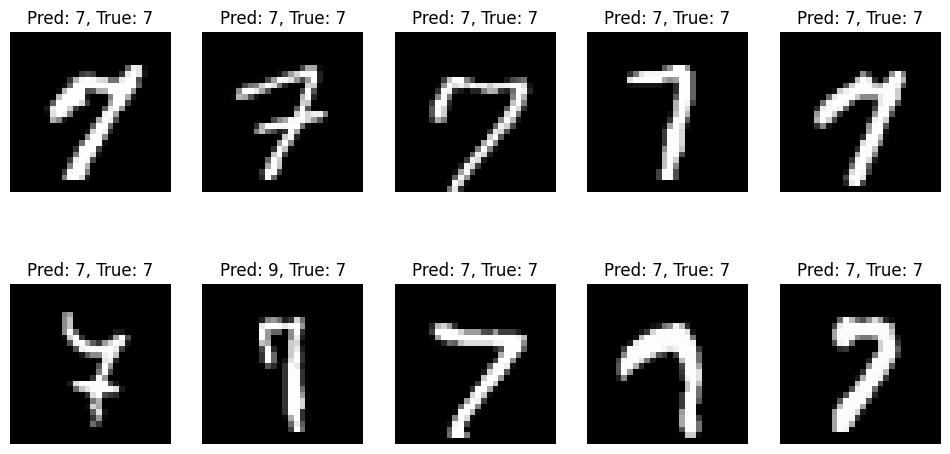

In [41]:
visualize_predictions(model, test_loader)

In [42]:
torch.save(model, 'simple_nn.pth')

In [ ]:
model.load_state_dict(torch.load('simple_nn.pth'))
model.eval()